### Libs

In [1]:
import shap
import joblib
import pandas as pd
from sklearn import metrics as skmetrics
from sklearn import metrics

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### Variáveis categóricas

In [3]:
def dtype_category():
    return {
        'AP_TPUPS': 'category',
        'AP_TIPPRE': 'category',
        'AP_MN_IND': 'category',
        'AP_SEXO': 'category',
        'AP_RACACOR': 'category',
        'AP_UFDIF': 'bool',
        'AQ_TRANTE': 'category',
        'AQ_CONTTR': 'category'
    }

### Carrega datasets

In [4]:
df_train = pd.read_csv(
    '../data/Banco_Datathon/Banco_Datathon/processed/train_v4.csv', 
    index_col=0,
    dtype=dtype_category()
)
df_test = pd.read_csv(
    '../data/Banco_Datathon/Banco_Datathon/processed/test_v4.csv', 
    index_col=0,
    dtype=dtype_category()
)
model = joblib.load(f"../model/model_lgbm_v4.pkl")

### Modelo no formato pkl

In [5]:
model

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=3000, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=42, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbose=2)

In [6]:
print(df_train.shape)
df_train.head()

(280000, 75)


rh_enfermeiros_2014  rh_enfermeiros_2015  rh_enfermeiros_2016  \
48824                2535.0               2817.0               2940.0   
34936                 524.0                593.0                664.0   
190397               2535.0               2817.0               2940.0   
57745                 171.0                173.0                172.0   
205609               1611.0               1744.0               1918.0   

        rh_enfermeiros_2017  rh_enfermeiros_2018  rh_medicos_2014  \
48824                3087.0               3375.0           5650.0   
34936                 697.0                755.0            955.0   
190397               3087.0               3375.0           5650.0   
57745                 201.0                208.0            357.0   
205609               2001.0               2154.0           5005.0   

        rh_medicos_2015  rh_medicos_2016  rh_medicos_2017  rh_medicos_2018  \
48824            5780.0           5984.0           6200.0           6290.0   
34936            1028.0           1078.0           1108.0           1169.0   
190397           5780.0           5984.0           6200.0           6290.0   
57745             386.0            448.0            451.0            469.0   
205609           5244.0           5296.0           5523.0           5657.0   

        rf_leitos_2014  rf_leitos_2015  rf_leitos_2016  rf_leitos_2017  \
48824           5365.0          5353.0          5395.0          5327.0   
34936           1179.0          1179.0          1187.0          1230.0   
190397          5365.0          5353.0          5395.0          5327.0   
57745            663.0           663.0           675.0           876.0   
205609          3248.0          3219.0          3250.0          3280.0   

        rf_leitos_2018  rf_mamografos_2014  rf_mamografos_2015  \
48824           5281.0                21.0                20.0   
34936           1246.0                 6.0                 6.0   
190397          5281.0                21.0                20.0   
57745            876.0                 3.0                 3.0   
205609          3206.0                21.0                24.0   

        rf_mamografos_2016  rf_mamografos_2017  rf_mamografos_2018  \
48824                 20.0                21.0                19.0   
34936                  7.0                 5.0                 7.0   
190397                20.0                21.0                19.0   
57745                  3.0                 3.0                 4.0   
205609                24.0                22.0                22.0   

        rf_raios_x_2014  rf_raios_x_2015  rf_raios_x_2016  rf_raios_x_2017  \
48824             144.0            140.0            140.0            141.0   
34936              40.0             40.0             43.0             44.0   
190397            144.0            140.0            140.0            141.0   
57745              10.0             10.0             10.0             12.0   
205609            159.0            167.0            165.0            158.0   

        rf_raios_x_2018  rf_ressonancia_mag_2014  rf_ressonancia_mag_2015  \
48824             150.0                      7.0                      7.0   
34936              54.0                      4.0                      5.0   
190397            150.0                      7.0                      7.0   
57745              12.0                      2.0                      2.0   
205609            154.0                      7.0                      7.0   

        rf_ressonancia_mag_2016  rf_ressonancia_mag_2017  \
48824                       7.0                      7.0   
34936                       5.0                      7.0   
190397                      7.0                      7.0   
57745                       2.0                      2.0   
205609                      7.0                      9.0   

        rf_ressonancia_mag_2018  rf_tomografos_comp_2014  \
48824                       7.0                     22.0   
34936    

### Separa variáveis preditoras das variável resposta

In [7]:
def split_between_X_and_y(df, target):
    y = df[target]
    X = df.drop(columns=[target])
    
    return X, y

In [8]:
X_train, y_train = split_between_X_and_y(df_train, target='tardio')
X_test, y_test = split_between_X_and_y(df_test, target='tardio')

### Shap - Interpretando o modelo

In [26]:
explainer = shap.TreeExplainer(model)

In [29]:
shap_values = explainer.shap_values(X_train, tree_limit=1200)

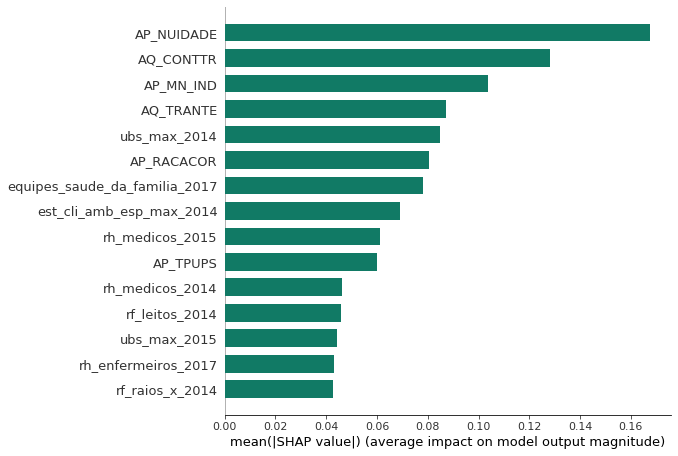

In [30]:
shap.summary_plot(shap_values, features=X_train, plot_type='bar', max_display=15, color='#117A65')

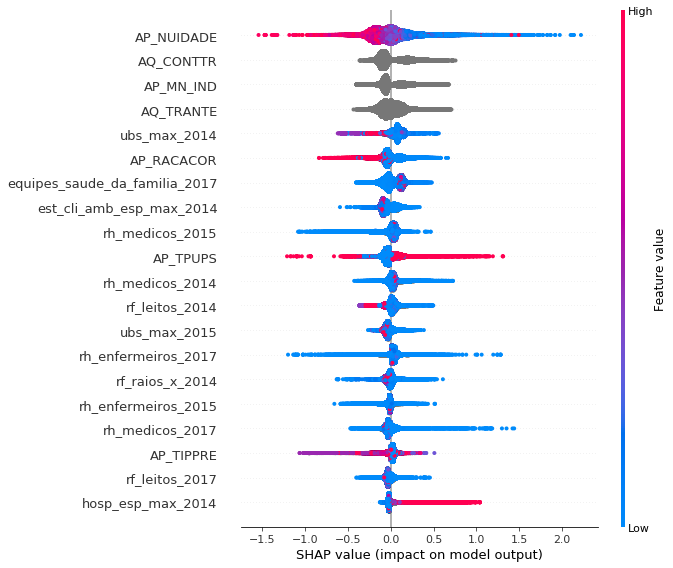

In [31]:
shap.summary_plot(shap_values, X_train, plot_type='dot', show=True)

- `AP_NUIDADE` : A idade é a variável mais importante | Quanto maior a idade, menos diagnóstico tardio como visto aqui e em `notebooks/eda_mama`
- `AQ_CONTTR` : Continuidade do tratamento (S = Sim; N = Não) | Se sim, menos diagnóstico tardio como visto aqui e em `notebooks/eda_mama`
- `AP_MN_IND` : Estabelecimento Mantido / Individual | Se Individual, menos diagnóstico tardio como visto em `notebooks/eda_mama`
- `AQ_TRANTE` : Tratamentos anteriores (S = Sim; N = Não) | Se sim, menos diagnóstico tardio como visto em `notebooks/eda_mama`
- `ubs_max_2014` : Número máximo de UBSs no município de residência do paciente em 2014 | Quanto maior, menos diagnóstico tardio

### Fontes

- Implementação do modelo LightGBM. Este modelo é baseado é um Gradient Boosting baseado em árvores de decisão. Fonte: https://lightgbm.readthedocs.io/en/latest/index.html

- Interpretabilidade usando o Framework SHAP, baseado no Shapley Value da Teoria dos Jogos cooperativa. Fonte: https://arxiv.org/abs/1905.04610